![Spark Logo](http://spark-mooc.github.io/web-assets/images/ta_Spark-logo-small.png) + ![Python Logo](http://spark-mooc.github.io/web-assets/images/python-logo-master-v3-TM-flattened_small.png)
## Tasca M5T01 Machine Learning amb Apache Spark i Python
### Practica sobre cómo generar un flujo de ejecución en un problema de Machine Learning

Esta tarea simula un ejercicio completo de ETL (Extract-Transform-Load) junto a un análisis exploratorio de un dataset real, para posteriormente aplicar differentes algoritmos de aprendizaje automático que resuelvan un problema de regresión.

#### Contenido del ejercicio

* *Conocimiento del dominio*
* *Parte 1: Extracción, transformación y carga [ETL] del dataset* (2 punto sobre 10)
* *Parte 2: Explorar los datos* (2 puntos sobre 10)
* *Parte 3: Visualizar los datos* (2 puntos sobre 10)
* *Parte 4: Preparar los datos* (1 puntos sobre 10)
* *Parte 5: Modelar los datos* (3 puntos sobre 10)

*Nuestro objetivo será predecir de la forma más exacta posible la energía generada por un conjunto de plantas eléctricas usando los datos generados por un conjunto de sensores.*


## Conocimiento del dominio

### Background 

La generación de energía es un proceso complejo, comprenderlo para poder predecir la potencia de salida es un elemento vital en la gestión de una planta energética y su conexión a la red. Los operadores de una red eléctrica regional crean predicciones de la demanda de energía en base a la información histórica y los factores ambientales (por ejemplo, la temperatura). Luego comparan las predicciones con los recursos disponibles (por ejemplo, plantas, carbón, gas natural, nuclear, solar, eólica, hidráulica, etc). Las tecnologías de generación de energía, como la solar o la eólica, dependen en gran medida de las condiciones ambientales, pero todas las centrales eléctricas son objeto de mantenimientos tanto planificados y como puntuales debidos a un problema.

En esta tarea usaremos un ejemplo del mundo real sobre la demanda prevista (en dos escalas de tiempo), la demanda real, y los recursos disponibles de la red electrica de California: http://www.caiso.com/Pages/TodaysOutlook.aspx

![](http://content.caiso.com/outlook/SP/ems_small.gif)

El reto para un operador de red de energía es cómo manejar un déficit de recursos disponibles frente a la demanda real. Hay tres posibles soluciones a un déficit de energía: construir más plantas de energía base (este proceso puede costar muchos anos de planificación y construcción), comprar e importar de otras redes eléctricas regionales energía sobrante (esta opción puede ser muy cara y está limitado por las interconexiones entre las redes de transmisión de energía y el exceso de potencia disponible de otras redes), o activar pequeñas [plantas de pico](https://en.wikipedia.org/wiki/Peaking_power_plant). Debido a que los operadores de red necesitan responder con rapidez a un déficit de energía para evitar un corte del suministro, estos basan sus decisiones en una combinación de las dos últimas opciones. En esta práctica, nos centraremos en la última elección.

### La lógica de negocio

Debido a que la demanda de energía solo supera a la oferta ocasionalmente, la potencia suministrada por una planta de energía pico tiene un precio mucho más alto por kilovatio hora que la energía generada por las centrales eléctricas base de una red eléctrica. Una planta pico puede operar muchas horas al día, o solo unas pocas horas al año, dependiendo de la condición de la red eléctrica de la región. Debido al alto coste de la construcción de una planta de energía eficiente, si una planta pico solo va a funcionar por un tiempo corto o muy variable, no tiene sentido económico para que sea tan eficiente como una planta de energía base. Además, el equipo y los combustibles utilizados en las plantas base a menudo no son adecuados para uso en plantas de pico.

La salida de potencia de una central eléctrica pico varía dependiendo de las condiciones ambientales, por lo que el problema de negocio a resolver se podría describir como _predecir la salida de potencia de una central eléctrica pico en función de la condiciones ambientales_  - ya que esto permitiría al operador de la red hacer compensaciones económicas sobre el número de plantas pico que ha de conectar en cada momento (o si por el contrario le interesa comprar energía más cara de otra red).

Una vez descrita esta lógica de negocio, primero debemos proceder a realizar un análisis exploratorio previo y trasladar el problema de negocio (predecir la potencia de salida en función de las condiciones medio ambientales) en un tarea de aprendizaje automático (ML). Por ejemplo, una tarea de ML que podríamos aplicar a este problema es la regresión, ya que tenemos un variable objetivo (dependiente) que es numérica. Para esto usaremos [Apache Spark ML Pipeline](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark-ml-package) para calcular dicha regresión.

Los datos del mundo real que usaremos en esta tarea se componen de 5 conjuntos de 9.568 puntos de datos, cada uno con 4 atributos ambientales recogidos en una Central de Ciclo Combinado de más de 6 años (2006-2011), proporcionado por la Universidad de California, Irvine en [UCI Machine Learning Repository Combined Cycle Power Plant Data Set](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)). Para más detalles sobre el conjunto de datos visitar la página de la UCI, o las siguientes referencias:

* Pinar Tufekci, [Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods](http://www.journals.elsevier.com/international-journal-of-electrical-power-and-energy-systems/), International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615.
* Heysem Kaya, Pinar Tufekci and Fikret S. Gurgen: [Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine](http://www.cmpe.boun.edu.tr/~kaya/kaya2012gasturbine.pdf), Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai).

**Tarea a realizar durante la primera parte:**

Revisar la documentacion y referencias de:
* [Spark Machine Learning Pipeline](https://spark.apache.org/docs/latest/ml-guide.html#main-concepts-in-pipelines).


## Parte 1: Extracción, transformación y carga [ETL] del dataset


Ahora que entendemos lo que estamos tratando de hacer, el primer paso consiste en cargar los datos en un formato que podemos consultar y utilizar fácilmente. Esto se conoce como ETL o "extracción, transformación y carga". 

---> <font color="blue">**Configuración del entorno**</font>

<span style="color:navy"><strong>-> Per començar, resumim les etapes de descarrega i instal·lació del Spark per a que tot funcioni correctament</strong></span>

    * Verificar si es té Java 8 (1.8.231 en el meu cas) ; si no, escriure al Anaconda prompt o Notebook : 'conda install -c cyclus java-jdk'
    * Descarregar el fitxer per a Windows en 'https://www.apache.org/dyn/closer.lua/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz'
    * Posar el fitxer descarregat 'spark-3.5.1-bin-hadoop3.tgz' a la carpeta 'C:\spark' creada previament
    * Extreure amb 'right clic' o per consola bash
    * cmd : 'setx SPARK_HOME "C:\spark\spark-3.5.1-bin-hadoop3"'
    * cmd : 'setx PATH "%PATH%;%SPARK_HOME%\bin"'
    * Anaconda prompt o Notebook : 'pip install pyspark'
    * Anaconda prompt : 'pip install findspark'
    * Restart Notebook kernel and kepp on working...

In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pyspark
import findspark
findspark.init()
import random

import re
import os
import pandas as pd
from matplotlib import pyplot as plt
from math import floor

from pyspark import SparkConf, SparkContext, SQLContext, HiveContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

In [2]:
# Verificar si ya existe una SparkSession activa:

if 'spark' in globals():
    spark.stop()
    print("Había una sesión en marcha y ha parado")
else:
    print("No hay sesión en marcha")

In [3]:
# Verificar si ya existe un SparkContext activo:

if 'sc' in globals():
    sc.stop()
    print("Había un SparkContext y se ha detenido.")

--->  <font color="blue">**Tras haber obtenido errores al crear el SparkContext, se ha ampliado el código para incluir la verificación del Context y no solamente de la Session**</font>  

In [4]:
# Initialize SparkContext and SQLContext

sc = SparkContext(master="local[1]", appName="M5T01_Cristina_Cosma")
sqlContext = SQLContext(sc)

# Load the data with proper delimiter
data = sqlContext.read.csv('Dades_Folds5x2_pp.csv', header=True, inferSchema=True, sep=';')

# Print the first five lines
data.show(5)

C:\Users\Buba\anaconda3\lib\site-packages\pyspark\sql\context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+-----+-----+-------+-----+------+
|   AT|    V|     AP|   RH|    PE|
+-----+-----+-------+-----+------+
|14.96|41.76|1024.07|73.17|463.26|
|25.18|62.96|1020.04|59.08|444.37|
| 5.11| 39.4|1012.16|92.14|488.56|
|20.86|57.32|1010.24|76.64|446.48|
|10.82| 37.5|1009.23|96.62| 473.9|
+-----+-----+-------+-----+------+
only showing top 5 rows



---> <font color="blue">**Data Exploration**</font>

#### Desde la página de origen del conjunto de datos https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant, podemos obtener la siguiente información sobre las variables:
* Features consist of **hourly average** ambient variables 
* The averages are taken from various **sensors located around the plant that record the ambient variables every second**. 
* The variables are given **without normalization**.

Variables Table:

    Name	Role	Type    	     Description and units 
    AT	Feature	Continuous	in the range 1.81°C and 37.11 (°C)
    V	Feature	Continuous	in teh range 25.36-81.56 (cm Hg)
    AP	Feature	Continuous	in the range 992.89-1033.30 (milibar)
    RH	Feature	Continuous	in the range 25.56% to 100.16 (%)
    PE	Target	Continuous	420.26-495.76 MW
    
  

---> <font color="blue"> **Miramos qué datos tenemos**</font>

In [5]:
data.printSchema()

root
 |-- AT: double (nullable = true)
 |-- V: double (nullable = true)
 |-- AP: double (nullable = true)
 |-- RH: double (nullable = true)
 |-- PE: double (nullable = true)



In [42]:
# Contar el número total de filas
total_rows_data = data.count()

# Contar el número total de columnas
total_columns_data = len(data.columns)

# Calcular el espacio en memoria del DataFrame
memory_usage_data = data.rdd.map(lambda row: row.__sizeof__()).sum()

# Imprimir la información obtenida
print("Número total de filas (data):", total_rows_data)
print("Número total de columnas (data):", total_columns_data)
print("Espacio en memoria (data):", memory_usage_data, "bytes")


Número total de filas (data): 47840
Número total de columnas (data): 5
Espacio en memoria (data): 3444480 bytes


---> <font color="blue">**Estadísticas básicas**</font>

In [6]:
data.describe().show()

+-------+------------------+------------------+------------------+-----------------+------------------+
|summary|                AT|                 V|                AP|               RH|                PE|
+-------+------------------+------------------+------------------+-----------------+------------------+
|  count|             47840|             47840|             47840|            47840|             47840|
|   mean|19.651231187290833| 54.30580372073524|1013.2590781772577| 73.3089778428094|454.36500940635983|
| stddev|7.4521616583400085|12.707361709685806| 5.938535418520848|14.59965835208147|17.066281466837733|
|    min|              1.81|             25.36|            992.89|            25.56|            420.26|
|    max|             37.11|             81.56|            1033.3|           100.16|            495.76|
+-------+------------------+------------------+------------------+-----------------+------------------+



A partir nuestra exploración inicial de una muestra de los datos, podemos hacer varias observaciones sobre el proceso de ETL:
- Los datos son un conjunto de .csv (archivos con valores separados por coma o punto y coma) 
- Hay una fila de cabecera, que es el nombre de las columnas
- Parece que el tipo de los datos en cada columna es constante (es decir, cada columna es de tipo double)

El esquema de datos que hemos obtenido de UCI es:
- AT = Atmospheric Temperature in C
- V = Exhaust Vacuum Speed
- AP = Atmospheric Pressure
- RH = Relative Humidity
- PE = Power Output.  Esta es la variable dependiente que queremos predecir usando los otras cuatro

---> <font color="blue">**Distribuciones de las variables**</font>

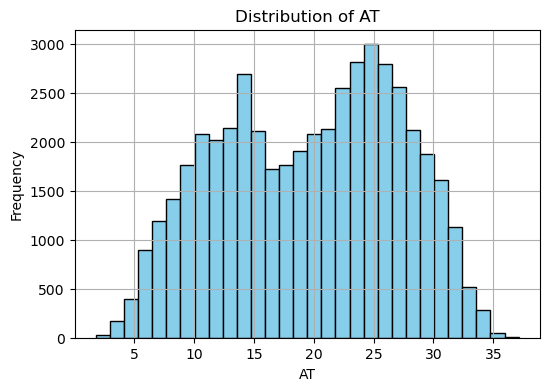

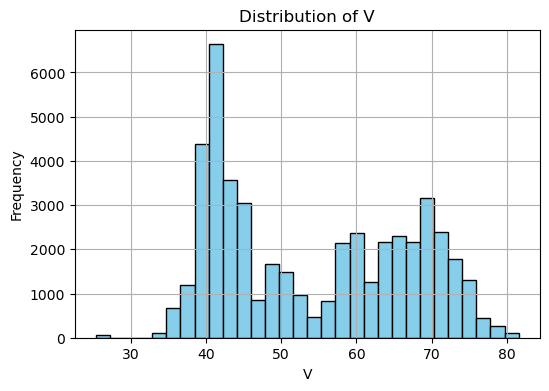

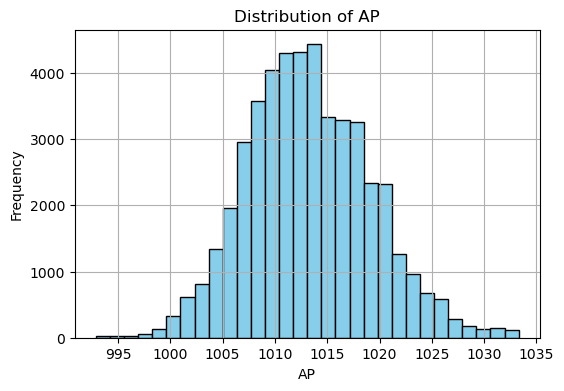

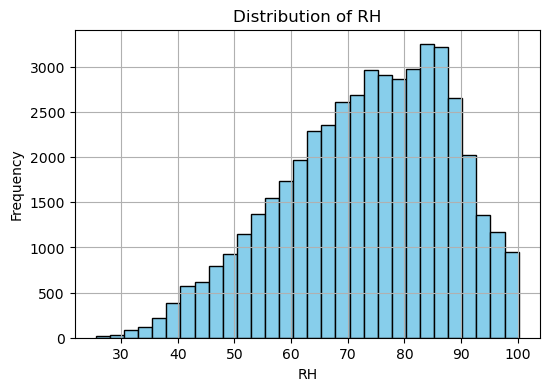

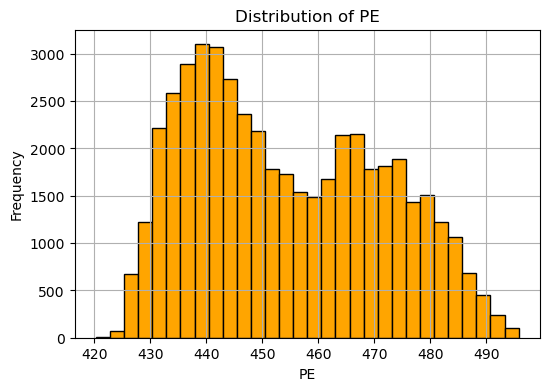

In [9]:
import matplotlib.pyplot as plt

# Plot histograms for each feature including 'PE' in a different color
columns = data.columns
for column in columns:
    plt.figure(figsize=(6, 4))
    if column == 'PE':
        plt.hist(data.select(column).rdd.flatMap(lambda x: x).collect(), bins=30, color='orange', edgecolor='black')
    else:
        plt.hist(data.select(column).rdd.flatMap(lambda x: x).collect(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


---> <font color="blue">**Distribución de las variables**</font>

    Vemos que las distribuciones no son normales, y la que podría parecerse a una distribución gaussiana es la columna AP.

Para usar el paquete Spark CSV, usaremos el método [sqlContext.read.format()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.format) para especificar el formato de la fuente de datos de entrada: `'csv'`

Podemos especificar diferentes opciones de como importar los datos usando el método [options()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.options).

Usaremos las siguientes opciones:
- `delimiter=';'` porque nuestros datos se encuentran delimitados por punto y coma
- `header='true'` porque nuestro dataset tiene una fila que representa la cabecera de los datos
- `inferSchema='true'` porque creemos que todos los datos son números reales, por lo tanto la librería puede inferir el tipo de cada columna de forma automática.

El ultimo componente necesario para crear un DataFrame es determinar la ubicación de los datos usando el método [load()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.load).

Juntando todo, usaremos la siguiente operación:

`sqlContext.read.format().options().load()`

### Ejercicio 1(b)

Crear un DataFrame a partir de los datos.
- El formato es csv

En el campo opciones incluiremos 3, formadas por nombre de opción y valor, separadas por punto y coma.
- El separador es el tabulador
- El fichero contiene cabecera 'header'
- Para crear un dataframe necesitamos un esquema (schema). A partir de los datos Spark puede tratar de inferir el esquema, le diremos 'true'.

El directorio a cargar es el especificado anteriormente. Es importante indicarle a Spark que es una ubicación ya montada en el sistema dbfs, como se ha mostrado en el ejercicio 2a.

In [12]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

# Create a DataFrame
powerPlantDF = sqlContext.read.format('csv') \
    .options(delimiter=';', header='true', inferSchema='true') \
    .load('Dades_Folds5x2_pp.csv')

# Check the type of the DataFrame
print(type(powerPlantDF))


<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
# TODO: Replace <FILL_IN> with the appropriate code.

sqlContext = SQLContext(sc)

#To stop spark context sc.stop()
powerPlantDF = sqlContext.read.format(<FILL_IN>).options(<FILL_IN>).load(<FILL_IN>)

type(powerPlantDF)

In [13]:
# TEST
expected = set([(s, 'double') for s in ('AP', 'AT', 'PE', 'RH', 'V')])
assert expected==set(powerPlantDF.dtypes), "Incorrect schema for powerPlantDF"

Vamos a comprobar los tipos de las columnas usando el metodo [dtypes](https://spark.apache.org/docs/1.6.2/api/python/pyspark.sql.html#pyspark.sql.DataFrame.dtypes).

In [15]:
# Print the schema to check the column types
print(powerPlantDF.dtypes)

[('AT', 'double'), ('V', 'double'), ('AP', 'double'), ('RH', 'double'), ('PE', 'double')]


---> <font color="blue">**Los datos son todos numéricos y de tipo "doble", que es lo mismo que "float" o decimal.**</font>

Tambien podemos examinar los datos usando el metodo `show()`.

In [14]:
# Show the first few rows of the DataFrame to examine the data
powerPlantDF.show()

[('AT', 'double'), ('V', 'double'), ('AP', 'double'), ('RH', 'double'), ('PE', 'double')]
+-----+-----+-------+-----+------+
|   AT|    V|     AP|   RH|    PE|
+-----+-----+-------+-----+------+
|14.96|41.76|1024.07|73.17|463.26|
|25.18|62.96|1020.04|59.08|444.37|
| 5.11| 39.4|1012.16|92.14|488.56|
|20.86|57.32|1010.24|76.64|446.48|
|10.82| 37.5|1009.23|96.62| 473.9|
|26.27|59.44|1012.23|58.77|443.67|
|15.89|43.96|1014.02|75.24|467.35|
| 9.48|44.71|1019.12|66.43|478.42|
|14.64| 45.0|1021.78|41.25|475.98|
|11.74|43.56|1015.14|70.72| 477.5|
|17.99|43.72|1008.64|75.04|453.02|
|20.14|46.93|1014.66|64.22|453.99|
|24.34| 73.5|1011.31|84.15|440.29|
|25.71|58.59|1012.77|61.83|451.28|
|26.19|69.34|1009.48|87.59|433.99|
|21.42|43.79|1015.76|43.08|462.19|
|18.21| 45.0|1022.86|48.84|467.54|
|11.04|41.74| 1022.6|77.51| 477.2|
|14.45|52.75|1023.97|63.59|459.85|
|13.97|38.47|1015.15|55.28| 464.3|
+-----+-----+-------+-----+------+
only showing top 20 rows



---> <font color="blue">**Acabamos de ver las 20 oprimeras filas de conjunto**</font>

Ahora en lugar de usar [spark csv](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html) para inferir (inferSchema()) los tipos de las columnas, especificaremos el esquema como [DataType](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.types.DataType), el cual es una lista de [StructField](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.types.StructType).

La lista completa de tipos se encuentra en el modulo [pyspark.sql.types](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#module-pyspark.sql.types). Para nuestros datos, usaremos [DoubleType()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.types.DoubleType).

Por ejemplo, para especificar cual es el nombre de la columna usaremos: `StructField(`_name_`,` _type_`, True)`. (El tercer parámetro, `True`, significa que permitimos que la columna tenga valores null.)

### Ejercicio 1(c)

Crea un esquema a medida para el dataset.

In [16]:
from pyspark.sql.types import *

# Custom Schema for Power Plant
customSchema = StructType([
    StructField("AT", DoubleType(), True),
    StructField("V", DoubleType(), True),
    StructField("AP", DoubleType(), True),
    StructField("RH", DoubleType(), True),
    StructField("PE", DoubleType(), True)
])

# Create a DataFrame with the custom schema
powerPlantDF = sqlContext.read.format('csv') \
    .options(delimiter=';', header='true') \
    .schema(customSchema) \
    .load('Dades_Folds5x2_pp.csv')

# Show the first few rows of the DataFrame to examine the data
powerPlantDF.show()


<class 'pyspark.sql.dataframe.DataFrame'>
[('AT', 'double'), ('V', 'double'), ('AP', 'double'), ('RH', 'double'), ('PE', 'double')]
+-----+-----+-------+-----+------+
|   AT|    V|     AP|   RH|    PE|
+-----+-----+-------+-----+------+
|14.96|41.76|1024.07|73.17|463.26|
|25.18|62.96|1020.04|59.08|444.37|
| 5.11| 39.4|1012.16|92.14|488.56|
|20.86|57.32|1010.24|76.64|446.48|
|10.82| 37.5|1009.23|96.62| 473.9|
|26.27|59.44|1012.23|58.77|443.67|
|15.89|43.96|1014.02|75.24|467.35|
| 9.48|44.71|1019.12|66.43|478.42|
|14.64| 45.0|1021.78|41.25|475.98|
|11.74|43.56|1015.14|70.72| 477.5|
|17.99|43.72|1008.64|75.04|453.02|
|20.14|46.93|1014.66|64.22|453.99|
|24.34| 73.5|1011.31|84.15|440.29|
|25.71|58.59|1012.77|61.83|451.28|
|26.19|69.34|1009.48|87.59|433.99|
|21.42|43.79|1015.76|43.08|462.19|
|18.21| 45.0|1022.86|48.84|467.54|
|11.04|41.74| 1022.6|77.51| 477.2|
|14.45|52.75|1023.97|63.59|459.85|
|13.97|38.47|1015.15|55.28| 464.3|
+-----+-----+-------+-----+------+
only showing top 20 rows



In [18]:
# Check the type of the DataFrame
print(type(powerPlantDF))

# Print the schema to check the column types
print(powerPlantDF.dtypes)

<class 'pyspark.sql.dataframe.DataFrame'>
[('AT', 'double'), ('V', 'double'), ('AP', 'double'), ('RH', 'double'), ('PE', 'double')]


In [19]:
# TEST
assert set([f.name for f in customSchema.fields])==set(['AT', 'V', 'AP', 'RH', 'PE']), 'Incorrect column names in schema.'
assert set([f.dataType for f in customSchema.fields])==set([DoubleType(), DoubleType(), DoubleType(), DoubleType(), DoubleType()]), 'Incorrect column types in schema.'

---> <font color="blue">**Se ha creado el Data Frame con esquema a medida mediante  *StructField* -> '*powerPlantDF*' y las características correspondientes**</font>

* **print(type(powerPlantDF))** imprimió el **tipo** del DataFrame para asegurarse de que se creó correctamente.
* **print(powerPlantDF.dtypes)** imprimió el **esquema** del DataFrame para verificar los nombres de las columnas y sus tipos de datos.
* **powerPlantDF.show()** mostró las primeras **filas** del DataFrame para revisar los datos.

### Exercicio 1(d)

Ahora, usaremos el esquema que acabamos de crear para leer los datos. Para realizar esta operación, modificaremos el paso anterior `sqlContext.read.format`. Podemos especificar el esquema haciendo:
- Añadir `schema = customSchema` al método load (simplemente añadirlo usando una coma justo después del nombre del archivo)
- Eliminado la opción `inferSchema='true'` ya que ahora especificamos el esquema que han de seguir los datos

In [20]:
# TODO: Use the schema you created above to load the data again.
altPowerPlantDF = sqlContext.read.format('csv').options(delimiter=';', header='true').schema(customSchema).load('Dades_Folds5x2_pp.csv')

In [22]:
# TEST

expected = set([(s, 'double') for s in ('AP', 'AT', 'PE', 'RH', 'V')])
assert expected==set(altPowerPlantDF.dtypes), "Incorrect schema for powerPlantDF"

Es importante darse cuenta que esta vez no se ha ejecutado ningún job de Spark. Esto se debe a que hemos especificado el esquema, por tanto el paquete [spark-csv](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html) no tiene por qué leer los datos para inferir el esquema. Podemos usar el método [dtypes](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.dtypes) para examinar el nombre y el tipo de los atributos del dataset. Estos deberían ser idénticos a los que hemos inferido anteriormente de los datos.

Cuando ejecutes la siguiente celda, los datos no deberían leerse.

In [23]:
# Print the schema to check the column types
print(altPowerPlantDF.dtypes)

[('AT', 'double'), ('V', 'double'), ('AP', 'double'), ('RH', 'double'), ('PE', 'double')]


In [25]:
print(type(altPowerPlantDF))


<class 'pyspark.sql.dataframe.DataFrame'>


Ahora podemos examinar los datos utilizando el método `show()`. 
* Ten en cuenta que esta operación hará que los datos que se lean y se creara el DataFrame. *

In [24]:
# Show the first few rows of the DataFrame to examine the data
altPowerPlantDF.show()

+-----+-----+-------+-----+------+
|   AT|    V|     AP|   RH|    PE|
+-----+-----+-------+-----+------+
|14.96|41.76|1024.07|73.17|463.26|
|25.18|62.96|1020.04|59.08|444.37|
| 5.11| 39.4|1012.16|92.14|488.56|
|20.86|57.32|1010.24|76.64|446.48|
|10.82| 37.5|1009.23|96.62| 473.9|
|26.27|59.44|1012.23|58.77|443.67|
|15.89|43.96|1014.02|75.24|467.35|
| 9.48|44.71|1019.12|66.43|478.42|
|14.64| 45.0|1021.78|41.25|475.98|
|11.74|43.56|1015.14|70.72| 477.5|
|17.99|43.72|1008.64|75.04|453.02|
|20.14|46.93|1014.66|64.22|453.99|
|24.34| 73.5|1011.31|84.15|440.29|
|25.71|58.59|1012.77|61.83|451.28|
|26.19|69.34|1009.48|87.59|433.99|
|21.42|43.79|1015.76|43.08|462.19|
|18.21| 45.0|1022.86|48.84|467.54|
|11.04|41.74| 1022.6|77.51| 477.2|
|14.45|52.75|1023.97|63.59|459.85|
|13.97|38.47|1015.15|55.28| 464.3|
+-----+-----+-------+-----+------+
only showing top 20 rows



---> <font color="blue">**Se ha creado el Spark Data Frame llamado '*altPowerPlantDF*' con esquema a medida usando el método *customSchema* y las características correspondientes**</font>


## Parte 2: Explorar tus Datos
### Ejercicio 2(a)

Ahora que ya hemos cargado los datos, el siguiente paso es explorarlos y realizar algunos análisis y visualizaciones básicas.

Este es un paso que siempre se debe realizar **antes de** intentar ajustar un modelo a los datos, ya que este paso muchas veces nos permitirá conocer una gran información sobre los datos.

En primer lugar vamos a registrar nuestro DataFrame como una tabla de SQL llamado `power_plant`. Debido a que es posible que repitas esta práctica varias veces, vamos a tomar la precaución de eliminar cualquier tabla existente en primer lugar.

Una vez ejecutado el paso anterior, podemos registrar nuestro DataFrame como una tabla de SQL usando [sqlContext.registerDataFrameAsTable()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.SQLContext.registerDataFrameAsTable).

Crea una tabla llamada `power_plant` con las indicaciones mostradas.

---> <font color="blue">**Creación de la tabla en un contexto SQL**</font>

* Para registrar nuestro DataFrame como una tabla SQL llamada power_plant, primero debemos asegurarnos de que no existe ninguna tabla con ese nombre. 
* Luego, podemos registrar el DataFrame usando sqlContext.registerDataFrameAsTable.

In [27]:
# Eliminar cualquier tabla existente con el nombre 'power_plant'
sqlContext.sql("DROP TABLE IF EXISTS power_plant")

DataFrame[]

Ahora que nuestro DataFrame existe como una tabla SQL, podemos explorarlo utilizando comandos SQL y `sqlContext.sql(...)`. Utiliza la función `show()` para visualizar el resultado del dataframe.

In [ ]:
# Registrar el DataFrame como una tabla SQL llamada 'power_plant'
sqlContext.registerDataFrameAsTable(altPowerPlantDF, "power_plant")

In [29]:
# Mostrar el contenido de la tabla usando una consulta SQL
sqlContext.sql("SELECT * FROM power_plant").show()

+-----+-----+-------+-----+------+
|   AT|    V|     AP|   RH|    PE|
+-----+-----+-------+-----+------+
|14.96|41.76|1024.07|73.17|463.26|
|25.18|62.96|1020.04|59.08|444.37|
| 5.11| 39.4|1012.16|92.14|488.56|
|20.86|57.32|1010.24|76.64|446.48|
|10.82| 37.5|1009.23|96.62| 473.9|
|26.27|59.44|1012.23|58.77|443.67|
|15.89|43.96|1014.02|75.24|467.35|
| 9.48|44.71|1019.12|66.43|478.42|
|14.64| 45.0|1021.78|41.25|475.98|
|11.74|43.56|1015.14|70.72| 477.5|
|17.99|43.72|1008.64|75.04|453.02|
|20.14|46.93|1014.66|64.22|453.99|
|24.34| 73.5|1011.31|84.15|440.29|
|25.71|58.59|1012.77|61.83|451.28|
|26.19|69.34|1009.48|87.59|433.99|
|21.42|43.79|1015.76|43.08|462.19|
|18.21| 45.0|1022.86|48.84|467.54|
|11.04|41.74| 1022.6|77.51| 477.2|
|14.45|52.75|1023.97|63.59|459.85|
|13.97|38.47|1015.15|55.28| 464.3|
+-----+-----+-------+-----+------+
only showing top 20 rows



In [ ]:
# Describir el esquema del DataFrame
altPowerPlantDF.printSchema()

root
 |-- AT: double (nullable = true)
 |-- V: double (nullable = true)
 |-- AP: double (nullable = true)
 |-- RH: double (nullable = true)
 |-- PE: double (nullable = true)



**Definición de Esquema**

Una vez más, nuestro esquema es el siguiente:

- AT = Atmospheric Temperature in C
- V = Exhaust Vacuum Speed
- AP = Atmospheric Pressure
- RH = Relative Humidity
- PE = Power Output

PE es nuestra variable objetivo. Este es el valor que intentamos predecir usando las otras mediciones.

*Referencia [UCI Machine Learning Repository Combined Cycle Power Plant Data Set](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant)*

Podemos obtener el DataFrame asociado a una tabla SQL usando el método [sqlContext.table()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrameReader.table) pasando como argumento el nombre de la tabla SQL.

### Ejercicio 2(b)

Ahora vamos a realizar un análisis estadístico básico de todas las columnas.

Calculad y mostrad los resultados en modo tabla (la función `show()` os puede ser de ayuda):
* Número de registros en nuestros datos
* Media de cada columna
* Máximo y mínimo de cada columna
* Desviación estándar de cada columna

Hint: Revisad [DataFrame](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame) ya que contiene métodos que permiten realizar dichos cálculos de manera sencilla.

In [36]:
total_rows = altPowerPlantDF.count()
total_columns = len(altPowerPlantDF.columns)

# Imprimir la información obtenida
print("Número total de filas:", total_rows)
print("Número total de columnas:", total_columns)


Número total de filas: 47840
Número total de columnas: 5


In [40]:

# Calcular el espacio en memoria en bytes
memory_usage = altPowerPlantDF.rdd.map(lambda row: row.__sizeof__()).sum()

# Calcular el espacio en memoria en megabytes (MB)
memory_usage_mb = memory_usage / (1024 * 1024)

# Imprimir la información obtenida
print("Espacio en memoria (Bytes):", memory_usage, "Bytes")
print("Espacio en memoria (MB):", memory_usage_mb, "MB")


Espacio en memoria (Bytes): 3444480 Bytes
Espacio en memoria (MB): 3.284912109375 MB


---> <font color="blue">**Datos básicos obtenidos  el objeto ***altPowerPlantDF*** :**</font>

* Tiene más de 47 mil filas y 5 columnas
* El espacio en memoria que ocupa son 3.28 Mega Bytes

In [43]:
# Obtener un resumen estadístico de todas las columnas
altPowerPlantDF.describe().show()


+-------+------------------+------------------+------------------+-----------------+------------------+
|summary|                AT|                 V|                AP|               RH|                PE|
+-------+------------------+------------------+------------------+-----------------+------------------+
|  count|             47840|             47840|             47840|            47840|             47840|
|   mean|19.651231187290833| 54.30580372073524|1013.2590781772577| 73.3089778428094|454.36500940635983|
| stddev|7.4521616583400085|12.707361709685806| 5.938535418520848|14.59965835208147|17.066281466837733|
|    min|              1.81|             25.36|            992.89|            25.56|            420.26|
|    max|             37.11|             81.56|            1033.3|           100.16|            495.76|
+-------+------------------+------------------+------------------+-----------------+------------------+



## Parte 3: Visualizar los datos

Para entender nuestros datos, intentamos buscar correlaciones entre las diferentes características y sus correspondientes etiquetas. Esto puede ser importante cuando seleccionamos un modelo. Por ejemplo, si una etiqueta y sus características se correlacionan de forma lineal, un modelo de regresión lineal obtendrá un buen rendimiento; por el contrario si la relación es no lineal, modelos más complejos, como arboles de decisión pueden ser una mejor opción. Podemos utilizar herramientas de visualización para observar cada uno de los posibles predictores en relación con la etiqueta como un gráfico de dispersión para ver la correlación entre ellos.

==========================================================================================================================================================================================================
### Ejercicio 3(a)

#### Añade las siguientes figuras: 
Vamos a ver si hay una correlación entre la temperatura y la potencia de salida. Podemos utilizar una consulta SQL para crear una nueva tabla que contenga solo el de temperatura (AT) y potencia (PE), y luego usar un gráfico de dispersión con la temperatura en el eje X y la potencia en el eje Y para visualizar la relación (si la hay) entre la temperatura y la energía.

Realiza los siguientes pasos:
- Carga una muestra de datos aleatorios de 1000 pares de valores para PE y AT. Puedes utilizar una ordenación aleatoria o un sample() sobre el resultado. Para hacer el plot puedes hacer un collect().
- Utiliza matplotlib y Pandas para hacer un scatter plot (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

In [48]:
from matplotlib import pyplot as plt
import pandas as pd
from pyspark.sql.functions import rand 


In [48]:

# Crear la tabla altPowerPlantDF en el contexto de Spark
altPowerPlantDF.createOrReplaceTempView("altPowerPlantDF")
x_y = sqlContext.sql("SELECT AT, PE FROM altPowerPlantDF ORDER BY rand()").limit(1000).collect()

# Crear un DataFrame de Pandas a partir de los datos
x_y_DF = pd.DataFrame(x_y, columns=["AT", "PE"])

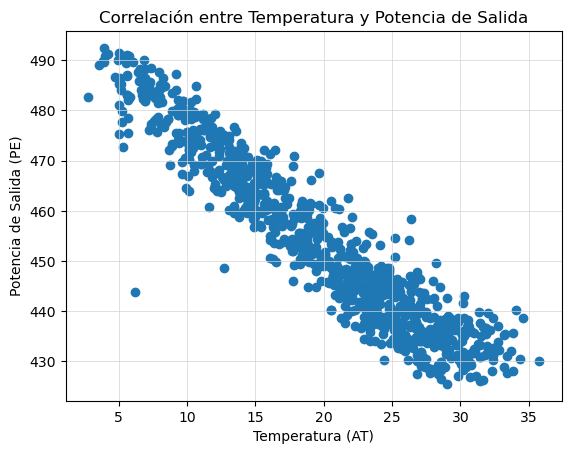

In [48]:
# Crear un gráfico de dispersión utilizando matplotlib y Pandas

plt.scatter(x_y_DF["AT"], x_y_DF["PE"])
plt.xlabel("Temperatura (AT)")
plt.ylabel("Potencia de Salida (PE)")
plt.title("Correlación entre Temperatura y Potencia de Salida")
plt.grid(color='lightgray', linestyle='-', linewidth=0.5)
plt.show()

---> <font color="blue">**Comentarios**</font>

* Parece que hay una **correlación muy fuerte con una **clarísima línea de tendencia** entre temperatura y power output** pero es una correlación **inversa** (negativa), es decir que cuanto más baja la temperatura, más demanda o consumo de energía se espera. 
* Esta correlación es esperable gracias a la **segunda ley de la termodinamica [thermal efficiency]**(https://en.wikipedia.org/wiki/Thermal_efficiency). Ir más allá en este análisis queda fuera del ámbito de esta práctica.

### Ejercicio 3(b)

Repitiendo el proceso anterior, usa una sentencia SQL para crear un gráfico de dispersión entre las variables Power (PE) y Exhaust Vacuum Speed (V).

Vamos a seguir un proceso similar al del ejercicio anterior para crear un gráfico de dispersión entre las variables Power (PE) y Exhaust Vacuum Speed (V). Aquí tienes el código necesario:

    Crear una consulta SQL para seleccionar las columnas PE y V.
    Ordenar los resultados de manera aleatoria y limitar a 1000 filas.
    Usar Pandas y Matplotlib para crear el gráfico de dispersión.

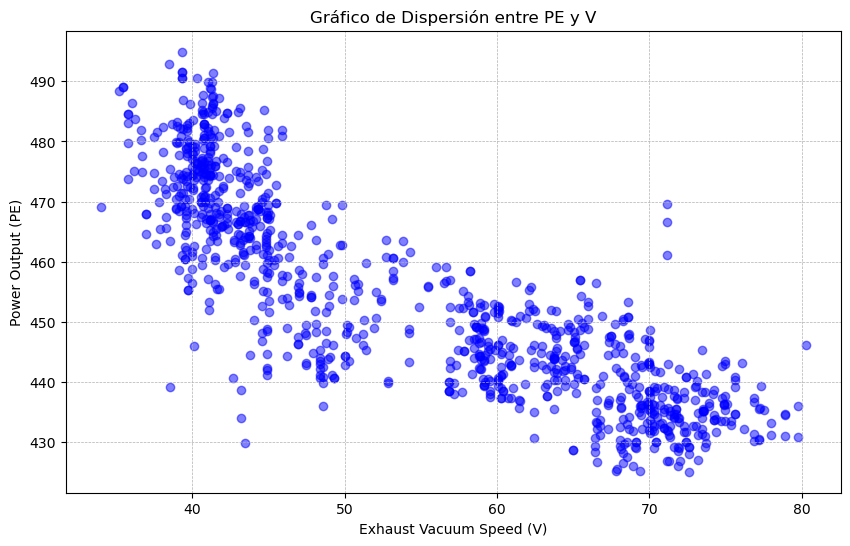

In [49]:
from matplotlib import pyplot as plt
import pandas as pd
from pyspark.sql.functions import rand

# Crear una muestra de datos aleatorios de 1000 pares de valores para PE y V
x_y = sqlContext.sql("SELECT PE, V FROM power_plant ORDER BY rand()").limit(1000).collect()

# Crear un DataFrame de Pandas a partir de los datos
x_y_DF = pd.DataFrame(x_y, columns=['PE', 'V'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(x_y_DF['V'], x_y_DF['PE'], c='blue', alpha=0.5)
plt.title('Gráfico de Dispersión entre PE y V')
plt.xlabel('Exhaust Vacuum Speed (V)')
plt.ylabel('Power Output (PE)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


---> <font color="blue">**Comentarios**</font>
 * Se observa una **importante correlación** con una **fuerte línea de tendencia** entre la demanda de energía (PE) y Exhaust Vacuum Speed (V), aunque presenta excepciones y es menor que con Temperatura (T)
 * Podemos decir con bastante seguridad que la Velocidad (V) es en gran medida inversamente proporcinal a la demanda de consumo  

Ahora vamos a repetir este ejercicio con el resto de variables y la etiqueta Power Output.

### Ejercicio 3(c)

Usa una sentencia SQL para crear un gráfico de dispersión entre las variables Power (PE) y Pressure (AP).

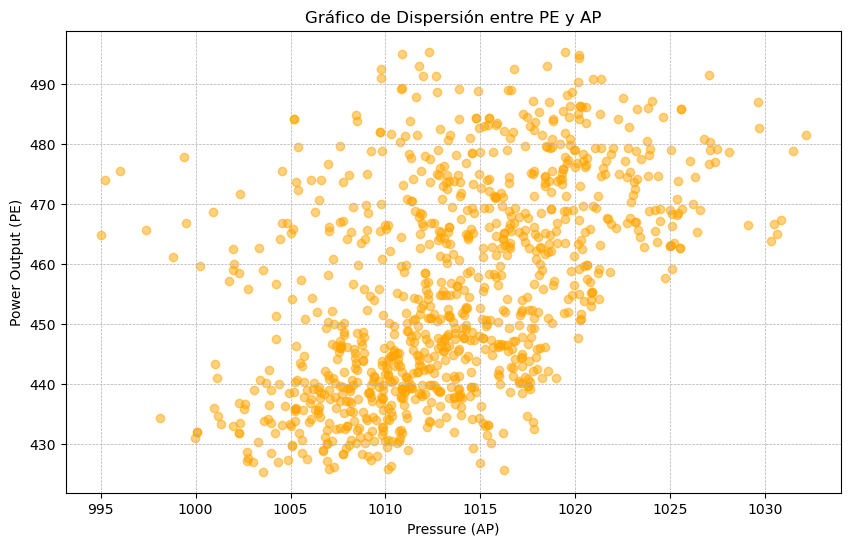

In [53]:

# Crear una muestra de datos aleatorios de 1000 pares de valores para PE y V
x_y = sqlContext.sql("SELECT PE, AP FROM power_plant ORDER BY rand()").limit(1000).collect()

# Crear un DataFrame de Pandas a partir de los datos
x_y_DF = pd.DataFrame(x_y, columns=['PE', 'AP'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(x_y_DF['AP'], x_y_DF['PE'], c='orange', alpha=0.5)
plt.title('Gráfico de Dispersión entre PE y AP')
plt.xlabel('Pressure (AP)')
plt.ylabel('Power Output (PE)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

---> <font color="blue">**Comentarios**</font>
 * Se observa una **importante correlación** con una **fuerte línea de tendencia** entre la demanda de energía (PE) y Exhaust Vacuum Speed (V), aunque presenta excepciones y es menor que con Temperatura (T) o Exhaust Vacuum Speed (V)
 * Velocidad (V) es **proporcional a la demanda de consumo** representada por Power Output (PE)

### Ejercicio 3(d)

Usa una sentencia SQL para crear un gráfico de dispersión entre las variables Power (PE) y Humidity (RH).

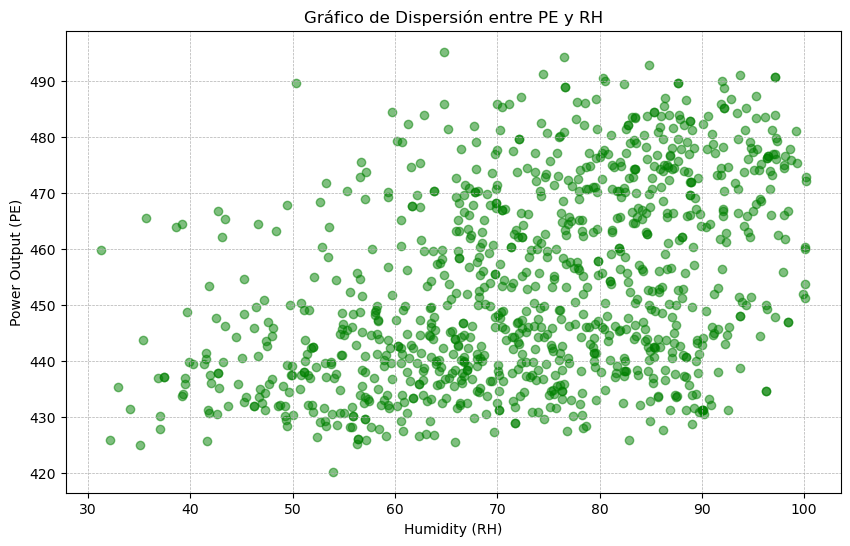

In [55]:
# Crear una muestra de datos aleatorios de 1000 pares de valores para PE y V
x_y = sqlContext.sql("SELECT PE, RH FROM power_plant ORDER BY rand()").limit(1000).collect()

# Crear un DataFrame de Pandas a partir de los datos
x_y_DF = pd.DataFrame(x_y, columns=['PE', 'RH'])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(x_y_DF['RH'], x_y_DF['PE'], c='green', alpha=0.5)
plt.title('Gráfico de Dispersión entre PE y RH')
plt.xlabel('Humidity (RH)')
plt.ylabel('Power Output (PE)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

---> <font color="blue">**Vamos a comprobar los grados de correlación entre PE y las demás variables**</font>

In [63]:
from pyspark.sql.functions import corr

# Calcular la correlación entre PE y las otras variables
pe_correlation = {}
for column in ['AT', 'V', 'AP', 'RH']:
    correlation = altPowerPlantDF.select(corr('PE', column)).collect()[0][0]
    pe_correlation[column] = round(correlation, 2)

# Imprimir la correlación específica con PE
print("\nCorrelación entre Power Output (PE) y las otras variables:", pe_correlation)



Correlación entre Power Output (PE) y las otras variables: {'AT': -0.95, 'V': -0.87, 'AP': 0.52, 'RH': 0.39}



---> <font color="blue">**Comentarios**</font>
 * Se observa una **alguna correlación positiva** entre la demanda de energía Power Output (PE) y la Humedad ambiental (RH), aunque con muchas excepciones
 * El grado de correlación, vizualmnete parece menor con RH que con Temperatura (T), Velocidad (V) y Presión atmosférica (PA), debido a que muchas veces la humedad en inverno resulta en días menos fríos en invierno y hace subir la temperatura, por lo tanto, muchos consumidores podrían bajar su demanda o consumo energético 
 * El caso de la **humedad** es interesante, porque si bien hace que sea más agradable en invierno (menos supongamos en casos de mucha lluvia o nieve), en verano sí puede aumentar el grado de inconfort y así, también la demanda en aire acondicionado y el consumo de energía en generral, como ilustra el gráfico en la parte derecha: cuando la humedad se acerca a 100%, la demanda energética puede ser tanto baja, media o máxima. 

**En conclusón**, la demanda de energía está primeramente relacionada con la temperatura del ambiente ya que aumenta casi invariablemente a medida que bajan las temperatures, mientras quew disminuye a medda que las temperaturas suben. Las excepciones que destacan en el gráfico *"Correlación entre Temperatura y Potencia de Salida"* que observamos podrían ser de algún momento atípico o que la demanda estaba cubierta por otros medios. 
  

## Parte 4: Preparación de los datos

El siguiente paso es preparar los datos para aplicar la regresión. Dado que todo el dataset es numérico y consistente, esta será una tarea sencilla y directa.

El objetivo es utilizar el método de regresión para determinar una función que nos de la potencia de salida como una función de un conjunto de características de predicción. El primer paso en la construcción de nuestra regresión es convertir las características de predicción de nuestro DataFrame a un vector de características utilizando el método [pyspark.ml.feature.VectorAssembler()](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.feature.VectorAssembler).

El VectorAssembler es una transformación que combina una lista dada de columnas en un único vector. Esta transformación es muy útil cuando queremos combinar características en crudo de los datos con otras generadas al aplicar diferentes funciones sobre los datos en un único vector de características. Para integrar en un único vector toda esta información antes de ejecutar un algoritmo de aprendizaje automático, el VectorAssembler toma una lista con los nombres de las columnas de entrada (lista de strings) y el nombre de la columna de salida (string).

==========================================================================================================================================================================================================
### Ejercicio 4

- Leer la documentación y los ejemplos de uso de [VectorAssembler](https://spark.apache.org/docs/latest/ml-features.html#vectorassembler)
- Convertir la tabla SQL `power_plant` en un `dataset` llamado datasetDF
- Establecer las columnas de entrada del VectorAssember: `["AT", "V", "AP", "RH"]`
- Establecer la columnas de salida como `"features"`

In [64]:
from pyspark.ml.feature import VectorAssembler

# Convertir la tabla SQL power_plant en un dataset llamado datasetDF
datasetDF = sqlContext.table("power_plant")

# Establecer las columnas de entrada del VectorAssembler
vectorizer = VectorAssembler(inputCols=["AT", "V", "AP", "RH"])

# Establecer la columna de salida del VectorAssembler
vectorizer.setOutputCol("features")


VectorAssembler_18be1314ba13

In [65]:
# TEST
assert set(vectorizer.getInputCols())== {"AT", "V", "AP", "RH"}, "Incorrect vectorizer input columns"
assert vectorizer.getOutputCol()=="features", "Incorrect vectorizer output column"

Con esto, hemos creado un VectorAssembler que toma las columnas "AT", "V", "AP" y "RH" como entrada y las combina en una sola columna llamada "features".

## Parte 5: Modelar los datos y proceder a la regresión lineal

Ahora vamos a modelar nuestros datos para predecir que potencia de salida se dara cuando tenemos una serie de lecturas de los sensores

La API de [Apache Spark MLlib](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#module-pyspark.ml) ofrece diferentes implementaciones de técnicas de regresion para modelar datasets. Ene ste ejercicio vamos a modelar nuestros datos para predecir que potencia de salida se dara cuando tenemos una serie de lecturas de los sensores basándonos en una simple regresion lineal ya que vimos algunos patrones lineales en nuestros datos en los graficos de dispersion durante la etapa de exploracion.

Necesitamos una forma de evaluar como de bien nuestro modelo de [regresion lineal](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.regression.LinearRegression) predice la produccion de potencia en funcion de parametros de entrada. Podemos hacer esto mediante la division de nuestros datos iniciales establecidos en un _Training set_ utilizado para entrenar a nuestro modelo y un _Test set_ utilizado para evaluar el rendimiento de nuestro modelo. Podemos usar el metodo nativo de los DataFrames [randomSplit()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.randomSplit) para dividir nuestro dataset. El metodo toma una lista de pesos y una semilla aleatoria opcional. La semilla se utiliza para inicializar el generador de numeros aleatorios utilizado por la funcion de division.

NOTA: Animamos a los alumnos a explorar las diferentes técnicas de regresión disponibles en la [API ML de Spark](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#module-pyspark.ml.classification)

==========================================================================================================================================================================================================
### Ejercicio 5(a)

Utiliza el método [randomSplit()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.randomSplit) para dividir `datasetDF` en trainingSetDF (80% del DataFrame de entrada) y testSetDF (20% del DataFrame de entrada), para poder reproducir siempre el mismo resultado, usar la semilla (seed) 1800009193. Finalmente, cachea (cache()) cada datafrane en memoria para maximizar el rendimiento.

In [69]:
# We'll hold out 20% of our data for testing and leave 80% for training
seed = 1800009193
(split20DF, split80DF) = datasetDF.randomSplit([0.2, 0.8], seed)

# Let's cache these datasets for performance
trainingSetDF = split80DF.cache()
testSetDF = split20DF.cache()


In [70]:
# TEST
assert trainingSetDF.count()== 38317, "Incorrect size for training data set"
assert testSetDF.count()== 9523, "Incorrect size for test data set"

### Ejercicio 5(b)

- A continuacion vamos a crear un modelo de regresion lineal y utilizar su ayda para entender como entrenarlo. 
- Ver la API de [Linear Regression](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.regression.LinearRegression) para más detalles.
- Lee la documentacion y los ejemplos de [Linear Regression](https://spark.apache.org/docs/latest/ml-classification-regression.html#linear-regression)
- Ejecuta la siguiente celda

---> <font color="blue">Importamos los módulos y librerías de Spark para la Regresión y miramos los parámetros</font>

In [75]:
# ***** LINEAR REGRESSION MODEL ****

from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import LinearRegressionModel
from pyspark.ml import Pipeline

# Let's initialize our linear regression learner
lr = LinearRegression()

# We use explain params to dump the parameters we can use
print(lr.explainParams())


aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
epsilon: The shape parameter to control the amount of robustness. Must be > 1.0. Only valid when loss is huber (default: 1.35)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label)
loss: The loss function to be optimized. Supported options: squaredError, huber. (default: squaredError)
maxBlockSizeInMB: maximum memory in MB for stacking input data into blocks. Data is stacked within partitions. If more than remaining data size in a partition then it is adjusted to the data size. Default 0.0 represents choosing optimal value, depends on specific algorithm. Must be >= 0. (default: 0.0)
maxIter: max number of iterations (>= 0). (default: 100)
predic

### Ejercicio 5(c)

- Lee la documentacion [Linear Regression](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.regression.LinearRegression) documentation
- Completa y ejecuta la siguiente celda introduciendo los parámetros descritos para nuestra regresion.

**La siguiente celda esta basada en [Spark ML Pipeline API for Linear Regression]**(https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.regression.LinearRegression).

El primer paso es establecer los valores de los parametros siguientes:
- Define el nombre de la columna a donde guardaremos la prediccion como "Predicted_PE"
- Define el nombre de la columna que contiene la etiqueta como "PE"
- Define el numero maximo de iteraciones a 100
- Define el parametro de regularizacion a 0.1

Ahora, **crearemos el [ML Pipeline]**(https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.Pipeline) (flujo de ejecucion) y estableceremos las fases del pipeline como vectorizar y posteriormente aplicar el regresor lineal que hemos definido.

**Finalmente, crearemos el modelo entrenandolo con el DataFrame `trainingSetDF`**

En **Apache Spark, el Pipeline es una herramienta que facilita la creación y gestión de flujos de trabajo de Machine Learning**. Ayuda a organizar y encadenar múltiples transformaciones y estimadores de manera secuencialy permite encapsular todo el proceso de preparación de datos y entrenamiento de modelos en un solo objeto, simplificando el flujo de trabajo.

**Función del Pipeline**
El Pipeline de Spark se inspira en la API de scikit-learn, y su propósito principal es gestionar el flujo de trabajo de Machine Learning de manera modular y reproducible. En Apache Spark, el Pipeline es una herramienta poderosa que facilita la creación y gestión de flujos de trabajo de Machine Learning. Te ayuda a organizar y encadenar múltiples transformaciones y estimadores de manera secuencial. Aunque en tu caso solo ves dos etapas, el Pipeline permite encapsular todo el proceso de preparación de datos y entrenamiento de modelos en un solo objeto, simplificando el flujo de trabajo.


In [77]:
# Now we set the parameters for the method
lr.setPredictionCol("Predicted_PE")\
  .setLabelCol("PE")\
  .setMaxIter(100)\
  .setRegParam(0.1)
  
# We will use the new spark.ml pipeline API, similar to scikit-learn methods
lrPipeline = Pipeline()

lrPipeline.setStages([vectorizer, lr])

# Let's first train on the entire dataset to see what we get
lrModel = lrPipeline.fit(trainingSetDF)


Del articulo de Wikipedia [Linear Regression](https://en.wikipedia.org/wiki/Linear_regression) podemos leer:
> In statistics, linear regression is an approach for modeling the relationship between a scalar dependent variable \\( y \\) and one or more explanatory variables (or independent variables) denoted \\(X\\). In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models.

Los modelos de regresion lineal tienen muchos usos practicos. La mayoria de los cuales se clasifican en de las siguientes dos categorias:
- Si el objetivo es la prediccion o la reduccion de errores, la regresion lineal puede utilizarse para adaptar un modelo predictivo a un conjunto de datos observados \\(y\\) y \\(X\\). Despues de desarrollar un modelo de este tipo, dado un cierto valor  \\( X\\) del que no conocemos su valor de \\(y \\), el modelo ajustado se puede utilizarse para hacer una prediccion del valor del posible valor \\(y \\).
- Dada una variable \\(y\\) y un numero de variables \\( X_1 \\), ..., \\( X_p \\) que pueden estar relacionadas con \\(y\\), un analisis de regresion lineal puede ser aplicado a cuantificar como de fuerte es la relacion entre \\(y\\) y cada \\( X_j\\), para evaluar que \\( X_j \\) puede no tener ninguna relacion con \\(y\\), y de esta forma identificar que subconjuntos de \\( X_j \\) contienen informacion redundante sobre \\(y\\).

Como estamos interesados en ambos usos, nos gustaria para predecir la potencia de salida en funcion de las variables de entrada, y nos gustaria saber cuales de las variables de entrada estan debilmente o fuertemente correlacionadas con la potencia de salida.

Ya que una regresion lineal tan solo calcula la linea que minimiza el error cuadratico medio en el dataset de entrenamiento, dadas multiples dimensiones de entrada podemos expresar cada predictor como una funcion lineal en la forma:

\\[ y = a + b x_1 + b x_2 + b x_i ... \\]

donde \\(a\\) es el intercept (valor para el punto 0) y las \\(b\\) son los coeficientes.

Para expresar los coeficientes de esa linea podemos recuperar la etapa del Estimador del Modelo del pipeline y de expresar los pesos y el intercept de la funcion.

### Ejercicio 5(d)

Ejecuta la celda siguiente y asegurate que entiendes lo que sucede.

In [78]:
# The intercept is as follows:
intercept = lrModel.stages[1].intercept

# The coefficients (i.e., weights) are as follows:
weights = lrModel.stages[1].coefficients

# Create a list of the column names (without PE)
featuresNoLabel = [col for col in datasetDF.columns if col != "PE"]

# Merge the weights and labels
coefficients = zip(weights, featuresNoLabel)

equation = "y = {intercept}".format(intercept=intercept)
variables = []
for x in coefficients:
    weight = abs(x[0])
    name = x[1]
    symbol = "+" if (x[0] > 0) else "-"
    equation += (" {} ({} * {})".format(symbol, weight, name))

# Finally here is our equation
print("Linear Regression Equation: " + equation)


Linear Regression Equation: y = 435.5639193766074 - (1.9173221801525955 * AT) - (0.2548382419437203 * V) + (0.08003570885266557 * AP) - (0.14707064759012597 * RH)


---> <font color="blue">**El objetivo del algoritmo de regresión lineal es encontrar los valores óptimos para los coeficientes que produzcan el mejor ajuste lineal a los datos observados**</font> 

---> <font color="blue">**Una vez que se han calculado estos coeficientes óptimos, se utilizan en la ecuación de regresión para hacer predicciones sobre nuevas instancias de datos.**</font>

---> <font color="blue">**Que obtenemos como resultado de esta ejecución?**</font>

      y = 435.5639193766074
        −(1.9173221801525955 × AT)
        −(0.2548382419437203 × V)
        +(0.08003570885266557 × AP)
        −(0.14707064759012597 × RH)
                
* **El resultado** de esta ejecución es la **ecuación de regresión lineal** que describe la **relación entre las características de entrada y la variable de salida** (en este caso, la **potencia de salida**). 
* La ecuación proporciona información sobre **cómo cada característica contribuye (peso) a la predicción** de la variable de salida:

**En esta ecuación**:



* **Intercepto**: Este es el punto donde la línea de regresión cruza el eje 𝑦 cuando todos los valores de las características (AT, V, AP, RH) son 0. Es el valor de y (en este caso, Power Output, PE) cuando la Temperatura (AT), la Velocidad de Vacío de Escape (V), la Presión (AP) y la Humedad (RH) son todos 0. Este valor de 435.56 es una especie de punto de partida o base antes de considerar los efectos de las otras variables.
    
* Los **números que representan los coeficientes (pesos)** en la ecuación de regresión lineal son **determinados durante el proceso de entrenamiento** del modelo. 
* Durante el entrenamiento, el **algoritmo de regresión lineal ajusta iterativamente estos coeficientes** para minimizar la función de pérdida, que es una medida de la discrepancia entre las predicciones del modelo y los valores reales del conjunto de entrenamiento.

---> <font color="blue">**Viendo esta ecuación, podemos concluir que:**</font>

    - El coeficiente de AT es -1.9173221801525955 ---> un aumento en la temperatura (AT) está asociado con una disminución en Power Output PE.
    - El coeficiente de V es -0.2548382419437203 ---> un aumento en V también está asociado con una disminución en Power Output PE.
    - El coeficiente de AP es +0.08003570885266557 ---> un aumento en AP está asociado con un aumento en Power Output PE.
    - El coeficiente de RH es -0.14707064759012597 ---> un aumento en RH está asociado con una disminución en Power Output PE.
    


### Ejercicio 5(e)

Ahora estudiaremos **como se comportan nuestras predicciones** en este modelo. 
* **Aplicamos el modelo de regresion lineal para el 20% de los datos** que hemos separado del conjunto de datos de entrada. 
* La salida del modelo será una **columna como estructura de datos** en un DataFrame, donde veamos la **producción de electricidad teórica llamada "Predicted_PE"**.


In [81]:
# Apply our LR model to the test data and predict power output
predictionsAndLabelsDF = lrModel.transform(testSetDF).select("AT", "V", "AP", "RH", "PE", "Predicted_PE")

predictionsAndLabelsDF.show()

+----+-----+-------+-----+------+------------------+
|  AT|    V|     AP|   RH|    PE|      Predicted_PE|
+----+-----+-------+-----+------+------------------+
|1.81|39.42|1026.92|76.97|490.55|492.91808512307705|
|2.34|39.42|1028.47|69.68|490.34|493.09810473724986|
|2.71|39.42|1026.66|81.11| 489.3| 490.5628133956149|
| 3.0|39.64| 1011.0|80.14| 485.2| 488.8400248776727|
|3.21|38.44| 1016.9|86.34|491.35|488.30356577734506|
|3.21|38.44|1017.11|84.86|492.93| 488.5380378346375|
|3.21|38.44|1017.11|84.86|492.93| 488.5380378346375|
|3.31|39.42|1024.05|84.31|487.19| 488.7329008151295|
|3.38|39.64| 1011.0|81.22|488.92|487.95260614981737|
|3.38|41.31| 998.79|97.76|489.11|484.11724176953965|
|3.51|35.47|1017.53|86.56|489.07| 488.5033056559795|
| 3.6|35.19|1018.73| 99.1|488.98|486.65387829735306|
|3.63|38.44|1016.16|87.38|487.87|487.28611056363627|
|3.68|39.64|1011.31|84.05|490.02|486.98601063283587|
|3.69|38.44|1016.74|82.87|490.78| 487.8807805645931|
|3.69|38.44|1016.74|82.87|490.78| 487.88078056

---> <font color="blue">**Resultados RMSE**</font>

Se puede observar como los **valores de salida de corriente (PE) se acercan a los valores reales** correspondientes en la salida de potencia predecida (Predicted_PE)

Sin embargo, nos gustaría disponer de una medida científica exacta de la bondad del modelo. Para realizar esta medición, podemos utilizar una métrica de evaluación como la [Error cuadrático medio](https://en.wikipedia.org/wiki/Root-mean-square_deviation) (RMSE) para validar nuestro modelo.

**RSME** se define como: \\( RMSE = \sqrt{\frac{\sum_{i = 1}^{n} (x_i - y_i)^2}{n}}\\) donde **\\(y_i\\) es el valor observado \\(x_i\\) es el valor predicho**

**RMSE** es una medida muy habitual para calcular las **diferencias entre los valores predichos por un modelo o un estimador y los valores realmente observados**. Cuanto menor sea el RMSE, mejor será nuestro modelo.

Spark ML Pipeline proporciona diferentes métricas para evaluar modelos de regresión, incluyendo [RegressionEvaluator()](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.evaluation.RegressionEvaluator).

Después de crear una instancia de [RegressionEvaluator](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.evaluation.RegressionEvaluator), fijaremos el nombre de la columna objetivo "PE" y  el nombre de la columna de predicción a "Predicted_PE". A continuación, invocaremos el evaluador en las predicciones.

### Ejercicio 5(f)

**RMSE (Error Cuadrático Medio)** y **RegressionEvaluator**:

    Importamos la clase **RegressionEvaluator** de **pyspark.ml.evaluation**, que se usa para evaluar el **rendimiento del modelo de regresión**.

**Pasos para la creación del Evaluador RMSE:**

    Creamos una instancia de RegressionEvaluator, especificando:
    predictionCol: La columna que contiene las predicciones del modelo ("Predicted_PE").
    labelCol: La columna que contiene los valores reales ("PE").
    metricName: El nombre de la métrica de evaluación que queremos usar ("rmse" para Root Mean Squared Error).
    
**Evaluación del DataFrame:**

    Ejecutamos el evaluador en el DataFrame de predicciones (predictionsAndLabelsDF) para calcular el RMSE.


In [85]:
# Now let's compute an evaluation metric for our test dataset
from pyspark.ml.evaluation import RegressionEvaluator

# Create an RMSE evaluator using the label and predicted columns
regEval = RegressionEvaluator(predictionCol="Predicted_PE", labelCol="PE", metricName="rmse")

# Run the evaluator on the DataFrame
rmse = regEval.evaluate(predictionsAndLabelsDF)

print("Root Mean Squared Error: %.2f" % rmse)


Root Mean Squared Error: 4.46


---> <font color="blue">**Resultados RMSE**</font>

* Este resultado indica que, **en promedio, las predicciones del modelo difieren de los valores reales en aproximadamente 4.46 unidades** de la **producción de energía (PE)**.


Para determinar si un modelo de regresión lineal es un buen estimador basándonos en el valor de RMSE (Error Cuadrático Medio), es importante considerar el contexto y la escala de los datos. En nuestro caso, el RMSE obtenido es 4.46. Vamos a analizar esto en detalle:

#### <font color="blue">**Análisis de RMSE y R2 en el Contexto de los Datos**</font>
Rangos de las Variables:

    AT (Temperatura): 1.81°C a 37.11°C
    V (Velocidad de Vacío de Escape): 25.36 cm Hg a 81.56 cm Hg
    AP (Presión Atmosférica): 992.89 milibar a 1033.30 milibar
    RH (Humedad): 25.56% a 100.16%
    PE (Producción de Energía): 420.26 MW a 495.76 MW
    
    
**Rango de Producción de Energía (PE)**: 
   
   La producción de energía varía de 420.26 MW a 495.76 MW, lo que da un rango total de aproximadamente 75.5 MW.

**Interpretación del RMSE:**

* Un RMSE de 4.46 indica que, en promedio, las predicciones del modelo difieren de los valores reales en 4.46 MW.
* Comparando este error con el rango total de PE (75.5 MW), podemos calcular el error relativo: Error Relativo = 4.46/75.5 ≈ 0.059, o 5.9 %

**Evaluación del Modelo**

* Error Relativo: Un error relativo de 5.9% puede considerarse relativamente bajo en muchos contextos de ingeniería y ciencia de datos, lo que sugiere que el modelo tiene un buen rendimiento.
Consistencia con los Datos: 

   * El hecho de que el modelo logra capturar la variabilidad de los datos con un error promedio de solo 4.46 MW es un indicativo positivo de su capacidad predictiva.
**Aplicabilidad Práctica:** 

* Si este nivel de precisión es suficiente para las aplicaciones prácticas (por ejemplo, en la gestión de la producción de energía en una planta), entonces el modelo puede considerarse un buen estimador.

**Conclusión**: 
* Considerando el rango de los datos y el RMSE obtenido, podemos concluir que el modelo de regresión lineal es un buen estimador para predecir la producción de energía en función de las variables de entrada (AT, V, AP, RH). El RMSE de 4.46 indica que el modelo tiene una precisión aceptable, y el error relativo del 5.9% es bastante bajo, lo que sugiere que el modelo es capaz de predecir la producción de energía con un alto grado de exactitud.


### El coeficiente de determinación \\(R ^ 2 \\)
Otra medida de evaluación estadística muy útil es el coeficiente de determinación, que se denota \\(R ^ 2 \\) o \\(r ^ 2\\) y pronunciado "R cuadrado". Es un número que indica la proporción de la variación en la variable dependiente que es predecible a partir de las variables independientes y proporciona una medida de lo bien que los resultados observados son replicados por el modelo, basado en la proporción de la variación total de los resultados explicada por el modelo. El coeficiente de determinación va de 0 a 1 (más cerca de 1), y cuanto mayor sea el valor, mejor es nuestro modelo.


Para calcular \\(r^2\\), hemos de ejecutar el evaluador `regEval.metricName: "r2"`

Vamos a calcularlo ejecutando la celda siguiente.

In [86]:
r2 = regEval.evaluate(predictionsAndLabelsDF, {regEval.metricName: "r2"})

print("r2: {0:.2f}".format(r2))

r2: 0.93


---> <font color="blue">**Análisis de los resultados de \\(R ^ 2 \\)**</font>

**Qué resultado de \\(r^2\\) hemos obtenido?** A partir de dicho parametro, crees que el **modelo calculado se ajusta bien a los datos**?

R2 se encuentra en un rango de 0 a 1. 

    - Si fuese de 0, indicaría que el modelo no explica ninguna de la variabilidad en los datos de respuesta alrededor de su media.
    - Si fuese de 0 1.0 indicaría que el modelo explica toda la variabilidad en los datos de respuesta alrededor de su media.

* Por lo tanto, 0.93 significa que el **93% de la variabilidad en la producción de energía (PE) puede ser explicada por las variables de entrada (AT, V, AP, RH) utilizando el modelo de regresión lineal**.
* Esto sugiere que el modelo tiene un **ajuste muy bueno a los datos** porque es **capaz de capturar la mayoría de la variabilidad en la producción de energía**.


**Alta Variabilidad Explicada y Consistencia con el RMSE**: 

* El hecho de que el modelo tenga un 𝑅2 de 0.93 significa que explica casi toda la variabilidad en los datos. Esto es un fuerte indicativo de que el modelo es efectivo y preciso.
* Un **RMSE de 4.46 combinado con un R2 de 0.93** sugiere que no solo el modelo es muy **bueno para predecir la producción de energía** en función de las variables de entrada (AT, V, AP, RH), sino que también tiene **errores de predicción relativamente bajos** en términos absolutos.


En general, suponiendo una distribución Gaussiana de errores, un buen modelo tendrá 68% de las predicciones dentro de 1 RMSE y 95% dentro de 2 RMSE del valor real (ver http://statweb.stanford.edu/~susan/courses/s60/split/node60.html).

Vamos a examinar las predicciones y ver si un RMSE como el obtenido cumple este criterio.

Crearemos un nuevo DataFrame usando [selectExpr()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.selectExpr) para generar un conjunto de expresiones SQL, y registrar el DataFrame como una tabla de SQL utilizando [registerTempTable()](https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.registerTempTable).

### Ejercicio 5(g)

Ejecuta la celda siguiente y asegúrate que entiendes lo que sucede.

In [ ]:
# First we remove the table if it already exists
# Next we calculate the residual error and divide it by the RMSE
predictionsAndLabelsDF.selectExpr("PE", "Predicted_PE", "PE - Predicted_PE Residual_Error", "(PE - Predicted_PE) / {} Within_RSME".format(rmse)).registerTempTable("Power_Plant_RMSE_Evaluation")

C:\Users\Buba\anaconda3\lib\site-packages\pyspark\sql\dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [90]:
# updated method
predictionsAndLabelsDF.selectExpr("PE", "Predicted_PE", "PE - Predicted_PE AS Residual_Error", "(PE - Predicted_PE) / {} AS Within_RSME".format(rmse)).createOrReplaceTempView("Power_Plant_RMSE_Evaluation")


Podemos utilizar sentencias SQL para explorar la tabla `Power_Plant_RMSE_Evaluation`. En primer lugar vamos a ver qué datos en la tabla utilizando una sentencia SELECT de SQL.

La siguiente consulta devolverá los elementos de la tabla `Power_Plant_RMSE_Evaluation` y muestra algunos por pantalla con la acción show().

La celda de código proporcionada realiza las siguientes acciones:

    Utiliza la función selectExpr() para seleccionar y calcular varias columnas en el DataFrame predictionsAndLabelsDF.
    Calcula la diferencia entre la variable objetivo PE y la variable predicha Predicted_PE, llamando a esta columna "Residual_Error".
    Divide el error residual por el RMSE calculado anteriormente, creando una nueva columna llamada "Within_RSME".
    Registra el nuevo DataFrame resultante, que contiene las columnas originales PE y Predicted_PE, así como las columnas calculadas "Residual_Error" y "Within_RSME", como una tabla temporal llamada "Power_Plant_RMSE_Evaluation".

In [91]:
sqlContext.sql("SELECT * FROM Power_Plant_RMSE_Evaluation").show()


+------+------------------+-------------------+--------------------+
|    PE|      Predicted_PE|     Residual_Error|         Within_RSME|
+------+------------------+-------------------+--------------------+
|490.55|492.91808512307705|-2.3680851230770372| -0.5305953545643743|
|490.34|493.09810473724986|  -2.75810473724988| -0.6179835119631268|
| 489.3| 490.5628133956149|-1.2628133956148986|-0.28294714360786566|
| 485.2| 488.8400248776727|-3.6400248776727153| -0.8155873586513247|
|491.35|488.30356577734506|  3.046434222654966|  0.6825868845568823|
|492.93| 488.5380378346375|  4.391962165362486|  0.9840671264957801|
|492.93| 488.5380378346375|  4.391962165362486|  0.9840671264957801|
|487.19| 488.7329008151295|-1.5429008151294852| -0.3457037912545762|
|488.92|487.95260614981737| 0.9673938501826456|   0.216755165571959|
|489.11|484.11724176953965| 4.9927582304603675|  1.1186820514724956|
|489.07| 488.5033056559795| 0.5666943440205046| 0.12697406164373062|
|488.98|486.65387829735306|  2.326

In [95]:
# Obtener las estadísticas básicas del DataFrame
statistics_df = sqlContext.sql("SELECT * FROM Power_Plant_RMSE_Evaluation").describe()

# Mostrar las estadísticas básicas
statistics_df.show()


+-------+-----------------+------------------+--------------------+--------------------+
|summary|               PE|      Predicted_PE|      Residual_Error|         Within_RSME|
+-------+-----------------+------------------+--------------------+--------------------+
|  count|             9523|              9523|                9523|                9523|
|   mean|454.0888617032462| 454.0752111413584|0.013650561886756084|0.003058557588881849|
| stddev|17.02271271103737|16.354369578721712|   4.463285195538818|  1.0000478309545147|
|    min|           420.26|421.21270663016924|   -43.0625782214056|  -9.648641316640504|
|    max|           495.76|493.09810473724986|  17.515165636077143|   3.924464298332475|
+-------+-----------------+------------------+--------------------+--------------------+



Vemos nuevamente las estadísticas de los datos de R2 y RMSE nos muestran desviaciones mínimas.

### Ejercicio 5(h)

Mostrad el RMSE como un histograma.
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

Puedes jugar con los diferentes parámetros del histograma como el numero de 'bins' o el parámetro densidad, que cambia entre el 'contaje' de elementos en cada bin o la normalización para que el area del histograma sea 1.
De forma similar al ejercicio 3, toma una muestra aleatoria de 2000 elementos y haz un collect para hacer el plot.

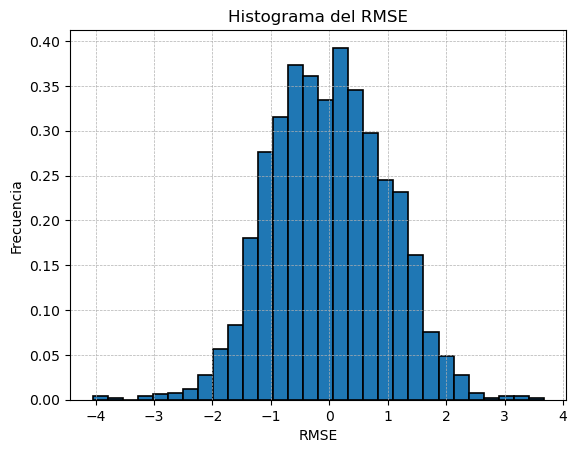

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Muestra aleatoria de 2000 elementos para el DataFrame
df_x = sqlContext.sql("SELECT Within_RSME FROM Power_Plant_RMSE_Evaluation ORDER BY rand() LIMIT 2000")

# Convertir los datos en un array numpy
x = np.array(df_x.toPandas())

# Número de bins para el histograma
num_bins = 30

# Generar el histograma con líneas finas
plt.hist(x, bins=num_bins, density=True, edgecolor='black', linewidth=1.2)

# Añadir grid de fondo con líneas finas
plt.grid(True, linestyle='--', linewidth=0.5)

# Añadir etiquetas y título
plt.xlabel('RMSE')
plt.ylabel('Frecuencia')
plt.title('Histograma del RMSE')

# Mostrar el histograma
plt.show()


---> <font color="blue">**Gráfico histograma**</font>
* El histograma deberia mostrar claramente que el RMSE se centra alrededor de 0 con la gran mayoría de errores dentro de 2 RMSE.
* El gráfico muestra una dstribucón casi normal de los datos de RMSE

**Usando una instrucción SELECT de SQL un poco más compleja, podemos contar el número de predicciones dentro de + o - 1,0 y + o - 2,0.**

        Cuantas predicciones estan dentro de cada uno de los intervalos (+-1 RSME, +-2RSME y más allá)? 
        Completad la parte de código que falta para poder averiguarlo.


In [98]:
'''
Si el error normalizado (Within_RSME) está dentro del rango de -1.0 a 1.0, asignamos un valor de 1 a la columna RSME_Multiple.
Si el error normalizado está dentro del rango de -2.0 a 2.0, asignamos un valor de 2 a la columna RSME_Multiple.
Para cualquier otro valor de Within_RSME, asignamos un valor de 3 a la columna RSME_Multiple.
Luego, agrupamos los resultados por la columna RSME_Multiple y contamos el número de ocurrencias en cada grupo utilizando la función COUNT(*).
'''

df_y=sqlContext.sql("SELECT case when Within_RSME <= 1.0 AND Within_RSME >= -1.0 then 1 when  Within_RSME <= 2.0 AND Within_RSME >= -2.0 then 2 else 3 end RSME_Multiple, COUNT(*) AS count FROM Power_Plant_RMSE_Evaluation GROUP BY case when Within_RSME <= 1.0 AND Within_RSME >= -1.0 then 1  when  Within_RSME <= 2.0 AND Within_RSME >= -2.0 then 2 else 3 end")

# Visionamos el resultado de la instrucción.
df_y.show()

+-------------+-----+
|RSME_Multiple|count|
+-------------+-----+
|            1| 6428|
|            3|  303|
|            2| 2792|
+-------------+-----+



---> <font color="blue">**Resultados**</font>

**Distribución de las predicciones del modelo en relación con el error cuadrático medio normalizado (RSME):**

* 6,428 predicciones están dentro de 1 RSME del valor real. Esto significa que alrededor del 67% de las predicciones están dentro de un rango aceptablemente cercano al valor real.
* 2,792 predicciones están dentro de 2 RSME del valor real. Esto representa aproximadamente el 29% adicional de las predicciones, lo que significa que en total, alrededor del 96% de las predicciones están dentro de 2 RSME, lo que indica una muy buena precisión del modelo.
* 303 predicciones están más allá de 2 RSME, lo que representa aproximadamente el 3% de las predicciones. Esto indica que solo un pequeño porcentaje de las predicciones tienen un error significativamente mayor que el esperado.

### <font color="blue">**Responde las siguientes preguntas**:</font>


- **¿Cuantas predicciones estan a 1 RMSE como máximo de los valores reales?** 
    ---> <font color="blue"> 6,428</font> 

- **¿Y cuantas predicciones estan a 2 RMSE como máximo de los valores reales?** 
    ---> <font color="blue"> 2,792</font> 

- **¿Te parece que el modelo ajusta bien los datos**? 

    ---> <font color="blue">Sí, ya que la mayoría de las predicciones del modelo están **dentro de un rango razonablemente cercano al valor real**, lo que sugiere que el modelo es bastante preciso y puede ser útil para predecir la producción de energía en la central eléctrica con una buena confianza.</font>   


- **¿Qué otras técnicas de regresión usaríais a partir del análisis de datos del apartado 3? ¿Estan todas disponibles en Spark? ¿Y si no es el caso, qué otros librarias y herramientas de Machine Learning podriamos usar?**

    --->  Basándonos en el análisis de datos del apartado 3, donde observamos relaciones lineales entre las variables, podemos considerar otras técnicas de regresión además de la regresión lineal. Algunas de estas técnicas podrían incluir:

    <font color="blue">Ranom Forest:</font> son robustos y pueden manejar conjuntos de datos con muchas características. Tienen una gran capacidad de generalización y son menos propensos al sobreajuste en comparación con un solo árbol de decisión.
    
    <font color="blue">Regresión Polinomial:</font> Si las relaciones entre las variables y la variable objetivo no son estrictamente lineales, podríamos usar regresión polinomial para modelar relaciones no lineales.

    <font color="blue">Regresión Ridge y Lasso:</font> Estas técnicas son útiles cuando hay multicolinealidad en los datos o cuando necesitamos regularizar los coeficientes para evitar el sobreajuste.

    <font color="blue">Regresión de Árboles de Decisión:</font> Los árboles de decisión pueden manejar relaciones no lineales y son robustos frente a valores atípicos. Además, los bosques aleatorios y los gradient boosting son extensiones de los árboles de decisión que pueden mejorar aún más la precisión del modelo.

    <font color="blue">Máquinas de Vectores de Soporte (SVM):</font> SVM puede ser útil cuando hay una clara separación entre las clases en los datos. Sin embargo, puede no ser la mejor opción para problemas de regresión en los que se busca predecir un valor continuo.

    <font color="blue">Redes Neuronales:</font> Las redes neuronales son muy flexibles y pueden capturar relaciones complejas entre las variables de entrada y la variable objetivo. Sin embargo, pueden ser computacionalmente intensivas y requerir grandes cantidades de datos para entrenar de manera efectiva.

<font color="blue">En cuanto a la disponibilidad en Spark</font>, no todas estas técnicas están directamente implementadas en Spark MLlib. Sin embargo, Spark MLlib ofrece la capacidad de integrar fácilmente algoritmos de aprendizaje automático de otras bibliotecas como **Scikit-learn** o **TensorFlow** utilizando la interfaz de Python o utilizando Spark para entrenar modelos distribuidos en clústeres de gran escala. Además, para aquellos algoritmos que no están disponibles en Spark, se pueden utilizar otras bibliotecas y herramientas de aprendizaje automático como **Scikit-learn, TensorFlow, Keras, XGBoost, LightGBM, entre otras**. Estas bibliotecas son ampliamente utilizadas en la comunidad de aprendizaje automático y ofrecen una amplia gama de algoritmos y funcionalidades para abordar una variedad de problemas de modelado.
